In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
chi=pd.read_csv('/Users/joshua/Desktop/Wankowicz Lab/1NV1_qFit_altloc_A_dihedral_angle.csv')

# Make all angles positive
chi.loc[chi['angle'] < 0, 'angle'] += 360

# Specify the folder path
folder_path = '/Users/joshua/Desktop/Wankowicz Lab/backbone_independent_energy'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to collect the DataFrames
dfs = []

# Loop through all CSV files and append the processed DataFrames to the list
for file_name in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file_name))
    df["AA_CHI"] = file_name.split('.')[0]  # Add the new column for AA_CHI & labeling each row by file name
    dfs.append(df)

# Concatenate all DataFrames in the list into one DataFrame
energy_bin = pd.concat(dfs, ignore_index=True) # The parameter ignore_index=True ensures that the index is reset in the concatenated DataFrame, so the rows are indexed sequentially from 0.

# Display the final DataFrame
print(energy_bin)

      Unnamed: 0  bin min  bin max   bin mid     f_bin         E    AA_CHI
0         177188  -90.177  -88.997  -89.5870  0.001327  0.847125  GLU_CHI3
1         154214  -88.997  -87.998  -88.4975  0.002035  0.594207  GLU_CHI3
2         192185  -87.998  -86.998  -87.4980  0.002079  0.581482  GLU_CHI3
3         176440  -86.998  -85.998  -86.4980  0.001947  0.620509  GLU_CHI3
4         176268  -85.998  -84.998  -85.4980  0.002057  0.587810  GLU_CHI3
...          ...      ...      ...       ...       ...       ...       ...
7644      541918  152.049  153.995  153.0220  0.000095  2.409935  TRP_CHI2
7645      536805  153.995  155.941  154.9680  0.000189  1.999801  TRP_CHI2
7646      538508  155.941  157.887  156.9140  0.000095  2.409935  TRP_CHI2
7647      540914  157.887  159.833  158.8600  0.000095  2.409935  TRP_CHI2
7648      545394  175.400  177.346  176.3730  0.000095  2.409935  TRP_CHI2

[7649 rows x 7 columns]


In [3]:
#ARG_chi4_data

In [4]:
# Define a function to process the chi data
def process_chi_data(chi_data, chi_bins): #chi data = angles, chi_bin = E 
    # Initialize an empty DataFrame to store results
    final_results = pd.DataFrame()

    # Loop through each row in chi_data
    for x in range(len(chi_data)):
        row = chi_data.iloc[[x]].copy()
        eval_angle = row['angle'].values[0]  # Get the angle value

        # Filter chi_bins for matching bin range
        matched_row = chi_bins[(chi_bins['bin min'] < eval_angle) & (chi_bins['bin max'] > eval_angle)]

        # If there's a matching bin, add the E value to the row
        if not matched_row.empty:
            row.loc[:, 'E'] = matched_row['E'].values[0]  # Use .loc for assignment
            final_results = pd.concat([final_results, row], ignore_index=True)

    return final_results


In [5]:
# Create an empty list to store processed data
process_list = []

# Iterate through each unique amino acid and chi angle, and process data accordingly
for amino_acid in chi['residue_type'].unique():
    # Filter the DataFrame by the current amino acid
    temp_df = chi[chi['residue_type'] == amino_acid]
    
    for chi_angle in temp_df['chi_angle'].unique():
        # Ensure chi_angle is a string and contains 'chi'
        if isinstance(chi_angle, str) and 'chi' in chi_angle:
            # Capitalize chi_angle if valid
            chi_angle_capital = chi_angle.upper()
            
            # Create the energy_bins key
            energy_bins = f"{amino_acid}_{chi_angle_capital}"
            
            # Filter the energy_bin DataFrame by the energy_bins key
            temp_energy = energy_bin[energy_bin['AA_CHI'] == energy_bins]
            
            # Further filter temp_df by the current chi_angle
            temp_df2 = temp_df[temp_df['chi_angle'] == chi_angle]
            
            # Process the chi data and append to process_list
            process = process_chi_data(temp_df2, temp_energy)
            #process_list.append(process)

            # Add the AA_CHI column using the energy_bins key
            process["AA_CHI"] = energy_bins
            
            process_list.append(process)

# Concatenate all processed DataFrames into one final DataFrame
final_sorted_data = pd.concat(process_list, ignore_index=True)
print(final_sorted_data)


    chain  residue_number alt_loc residue_type chi_angle       angle  \
0       A            1007                  ASP      chi1  185.895174   
1       A            1068                  ASP      chi1  222.995175   
2       A            1074                  ASP      chi1  285.743546   
3       A            1079                  ASP      chi1  287.357469   
4       A            1099                  ASP      chi1  289.245301   
..    ...             ...     ...          ...       ...         ...   
614     A            1233                  PRO      chi2   32.358504   
615     A            1239                  PRO      chi2   35.975571   
616     A            1271                  PRO      chi2   28.552392   
617     A            1283                  PRO      chi2   38.309195   
618     A            1315                  PRO      chi2   26.958935   

    angle_type         E    AA_CHI  
0          NaN -0.972726  ASP_CHI1  
1          NaN  1.512724  ASP_CHI1  
2          NaN -1.251872

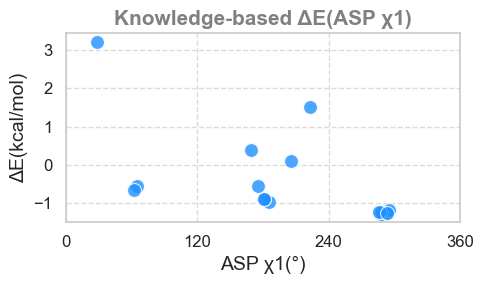

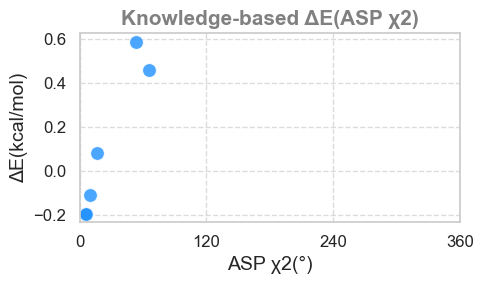

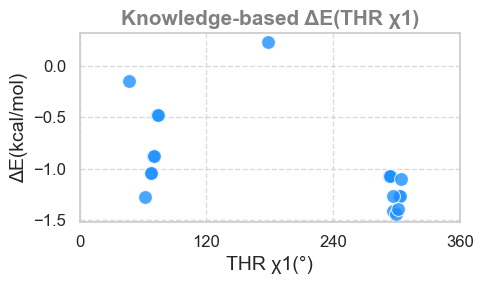

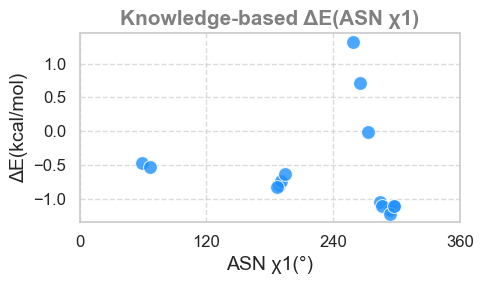

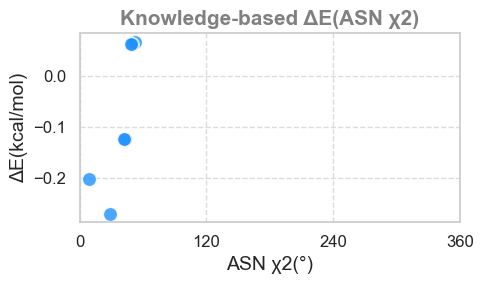

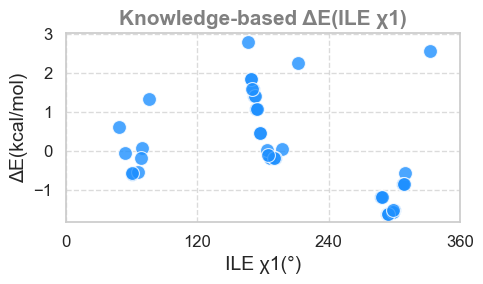

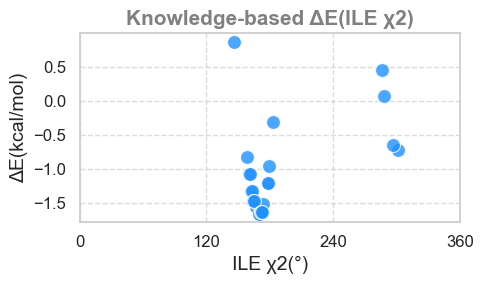

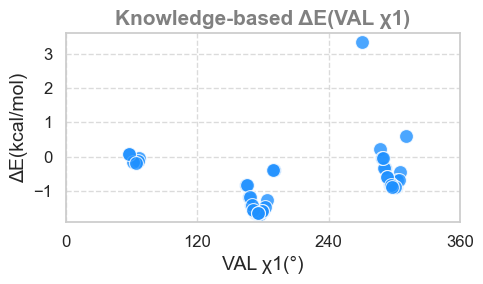

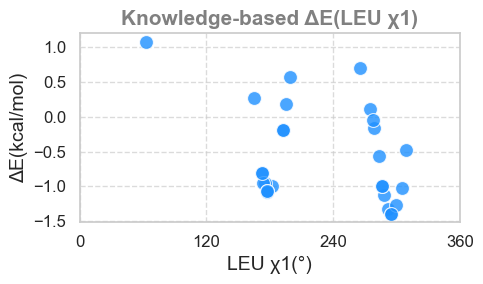

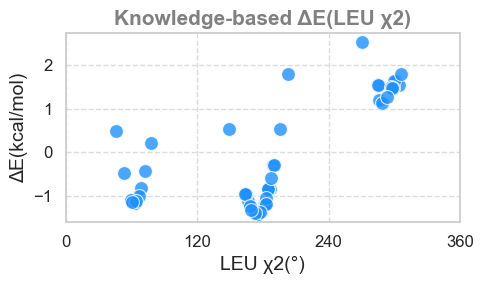

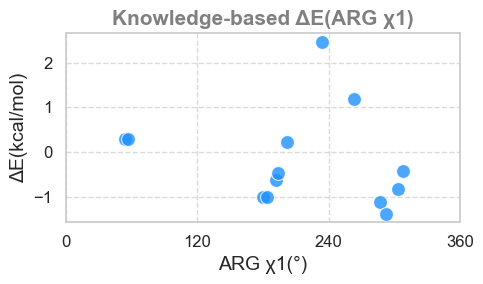

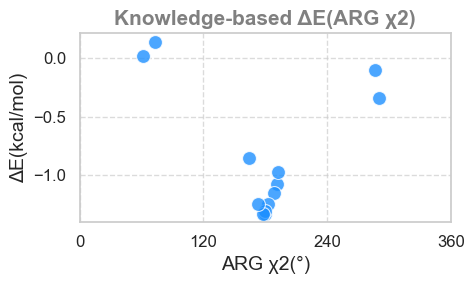

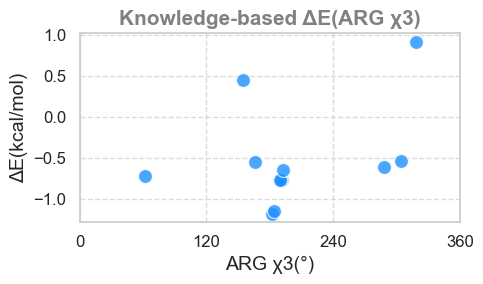

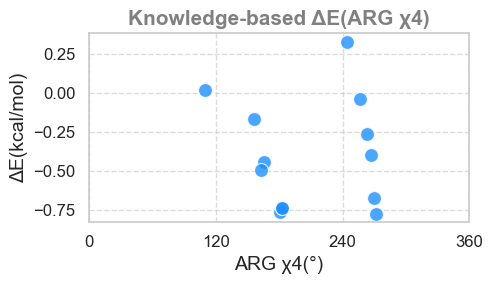

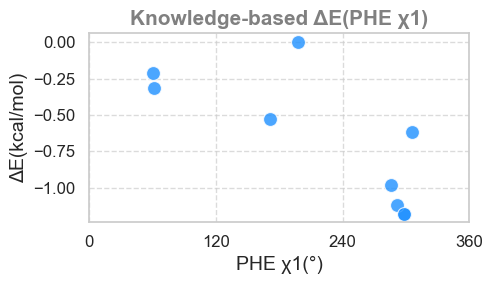

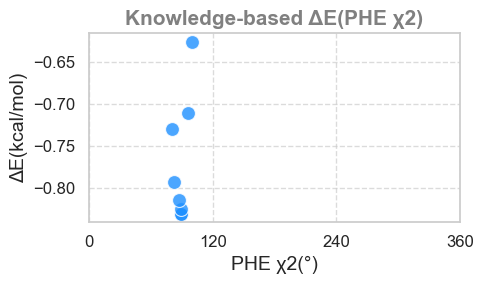

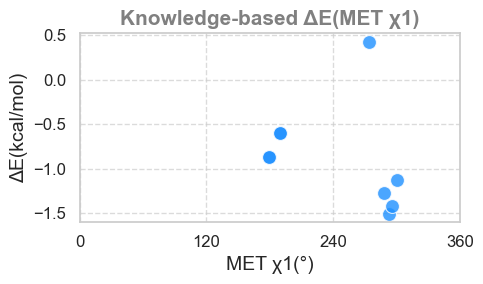

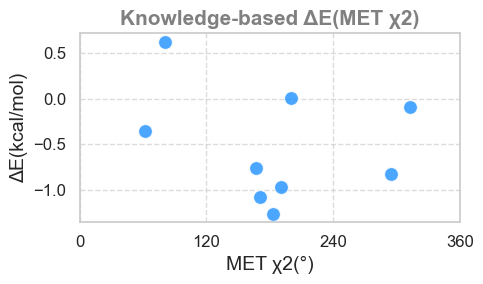

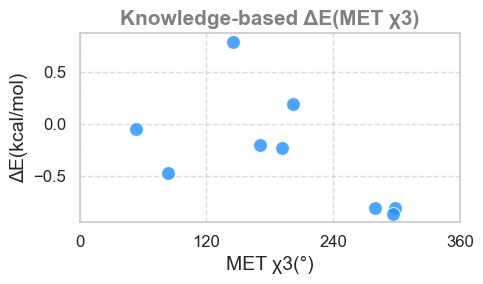

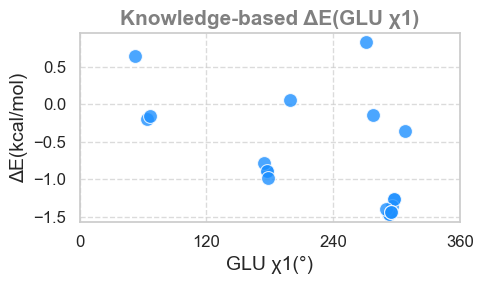

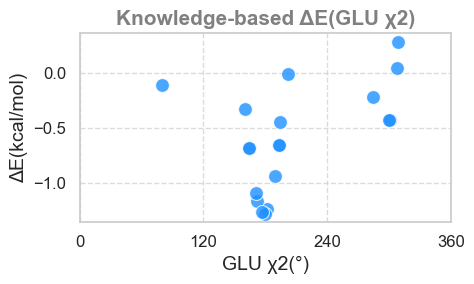

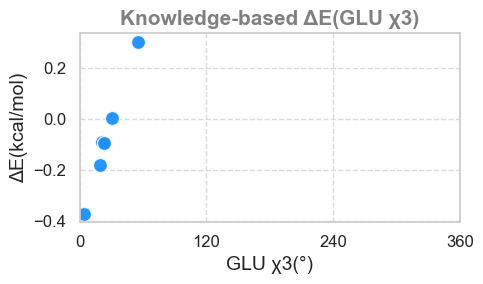

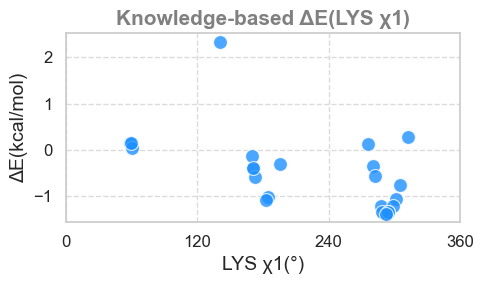

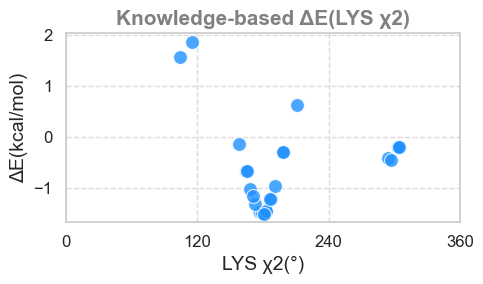

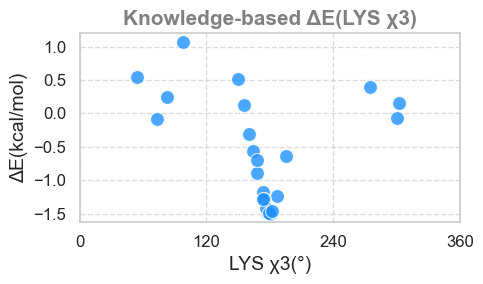

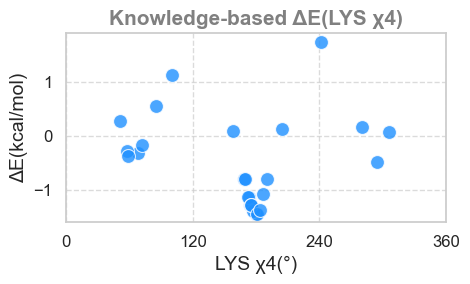

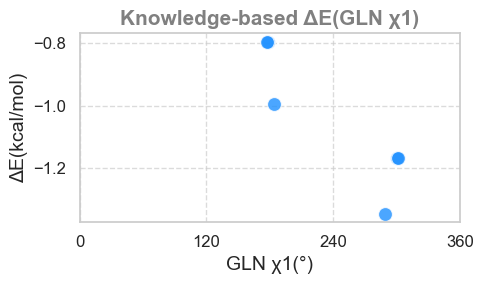

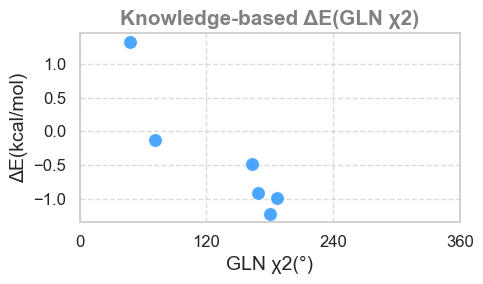

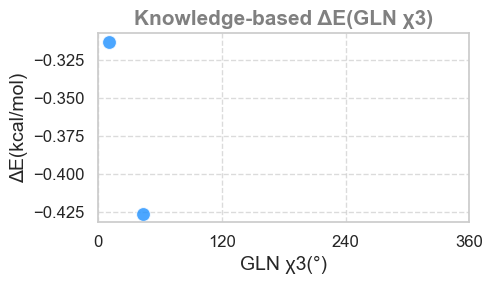

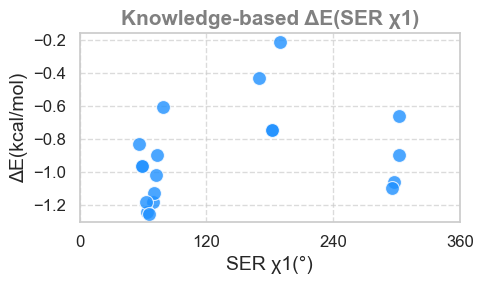

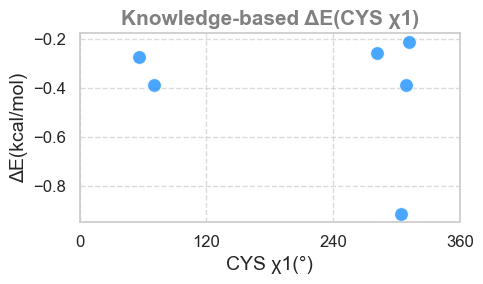

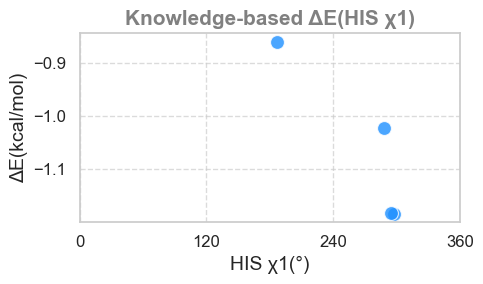

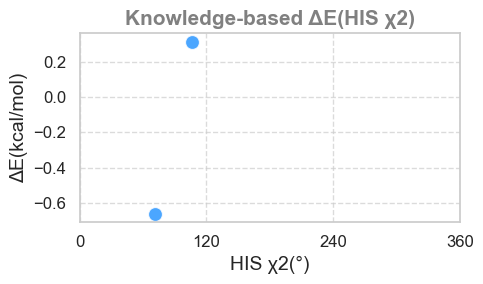

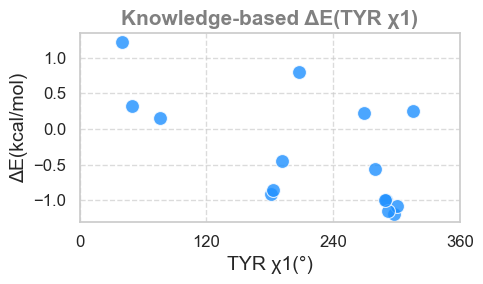

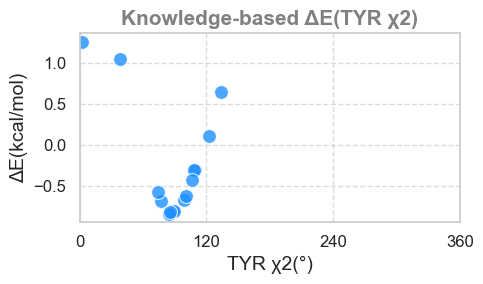

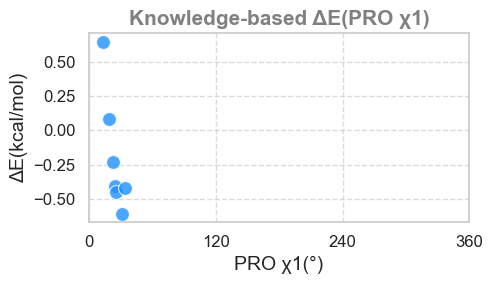

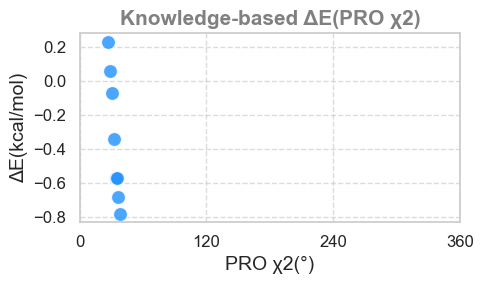

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# changing aesthetics 
sns.set(style='whitegrid', palette='muted') 

# Get unique AA_CHI values
unique_aa_chi = final_sorted_data['AA_CHI'].unique()

# Loop through each unique AA_CHI
for aa_chi in unique_aa_chi:
    # Filter for the specific amino acid and chi angle
    specific_aa_chi = final_sorted_data[final_sorted_data['AA_CHI'] == aa_chi]

    # Extract amino acid and chi angle, and replace 'CHI' with Greek letter 'χ'
    amino_acid, chi_angle = aa_chi.split('_')
    chi_angle = chi_angle.replace('CHI', 'χ')
    chi_angle_label = f"{amino_acid} {chi_angle}(°)" 

    # Create the plot
    plt.figure(figsize=(5, 3)) 
    sns.scatterplot(data=specific_aa_chi, x='angle', y='E', color='dodgerblue', s=100, edgecolor='w', alpha=0.8)
    plt.title(f'Knowledge-based ΔE({amino_acid} {chi_angle})', fontsize=15, fontweight='bold', color='gray')  # Set title color to gray
    plt.xlabel(chi_angle_label, fontsize=14)
    plt.ylabel('ΔE(kcal/mol)', fontsize=14)
    plt.xlim(0, 360)
    plt.xticks([0, 120, 240, 360], fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


  